### RGB中颜色由三个坐标决定
### 在HSV中颜色只由H决定  
- H:色调，就是什么颜色
- S：饱和度 表示颜色的纯度或强度
- V：亮度  表示颜色的敏感程度  
- 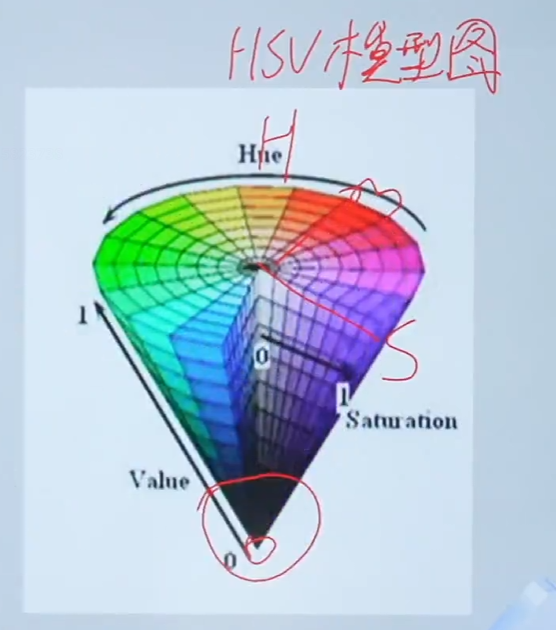
- HSV颜色范围
- 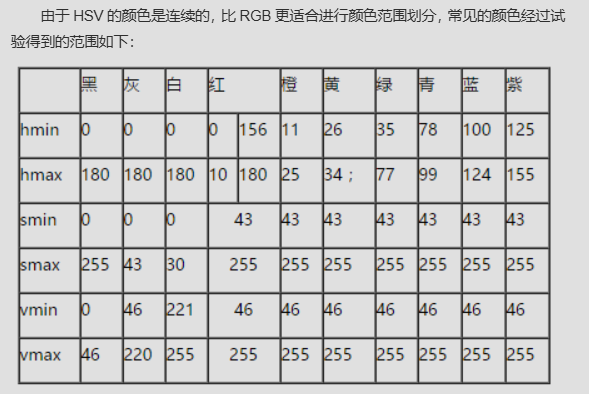

In [5]:
# 对图片中的某些颜色进行识别
import cv2
import numpy as np

# 1.图片输入：准备一张原始图片
image_np = cv2.imread("../image/four_color.png")
# resize: 将图像的大小进行修改，方便我们观察现象
image_np = cv2.resize(image_np, (700, 700))

# 2.将图片转换为HSV格式
image_hsv = cv2.cvtColor(image_np, cv2.COLOR_BGR2HSV)

# 3.制作掩膜：为了方便后续遮挡其他不关心的区域  使用inrange函数
# 定义掩膜低边界，HCV颜色边界最小值
lowerb = np.array([26, 43, 46])
# 定义掩膜高边界
upperb = np.array([34, 255, 255])

# 使用inRange函数，将hsv图像中的每一个值与lower和upper进行比较
# 当hsv图像中的像素点的hsv值处于数组范围之内，这个像素点就是我们要找的颜色

# inRange函数的作用：生成一个与原始图像大小相同的单通道图，其值要么是255，要么是0
# 第一个参数：原始图像 hsv图像
# 第二个参数：范围的最小值  是个数组
# 第三个参数：范围的最大值  是个数组
mask_image = cv2.inRange(image_hsv, lowerb, upperb)
# 4. 与运算：将原始图像和原始图像进行位与操作，并使用掩膜去掩盖掉不关心的部分
image_finall = cv2.bitwise_and(image_np, image_np, mask_image, mask=mask_image)

cv2.imshow("mask_image", mask_image)
cv2.imshow("image_finall", image_finall)
cv2.waitKey()

-1